In [3]:
import pandas as pd
from csv import QUOTE_NONE
import sys
import os
from pathlib import Path
import csv
from datetime import datetime
util_path = str(Path(os.path.abspath("")).parents[0] / "experiments" / "utils")
sys.path.append(util_path)
from word_emb_utils import tokenize_with_preprocessing_drop_len

In [4]:
max_int = sys.maxsize
while True:
    # Decrease the value by factor 10 as long as the OverflowError occurs.
    try:
        csv.field_size_limit(max_int)
        break
    except OverflowError:
        max_int = int(max_int/10)

def make_datetime(date):
        y, m, d = date.split("-")
        return datetime(int(y), int(m), int(d))

In [11]:
data_path = Path(os.path.abspath("")).parents[1] / "data" / "processed_data"

In [12]:
df  = pd.read_csv(str(data_path / "all_labeled.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")

In [13]:
stair_twitter_df = df[df["name"] == "stair twitter archive"]
length_of_df = len(stair_twitter_df.index)

stair_twitter_df["date"] = stair_twitter_df["date"].map(lambda a: make_datetime(a))
stair_twitter_drop_df = stair_twitter_df[stair_twitter_df["date"] < datetime(2016, 8, 13)]

<ipython-input-13-12a0e9e46da6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stair_twitter_df["date"] = stair_twitter_df["date"].map(lambda a: make_datetime(a))


In [14]:
df = df.drop(stair_twitter_drop_df.index, axis=0)

shooter_df = df[df["label"] == 1]
non_shooter_df = df[df["label"] == 0]

In [15]:
print(f"len whole dataset: {len(df.index)}")
print(f"len shooter set: {len(shooter_df.index)}")
print(f"len non-shooter set: {len(non_shooter_df.index)}")
print(f"ratio shooter/non_shooter: {len(shooter_df.index)/len(non_shooter_df.index)}")

len whole dataset: 19170
len shooter set: 3028
len non-shooter set: 16142
ratio shooter/non_shooter: 0.1875851815140627


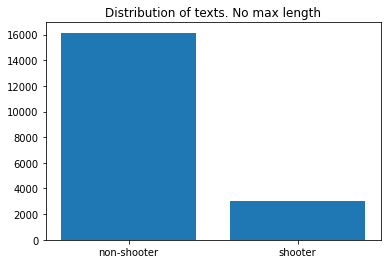

In [16]:
from matplotlib import pyplot as plt

plt.bar(["non-shooter", "shooter"], [len(non_shooter_df.index), len(shooter_df.index)])
plt.title("Distribution of texts. No max length")
plt.show()

In [19]:
data_path = Path(os.path.abspath("")).parents[1] / "data" / "processed_data"
preprocessed_path = Path(os.path.abspath("")).parents[1] / "data" / "processed_data" / "train_test" / "preprocessed_glove"

train_512_df = pd.read_csv(str(preprocessed_path / "train_sliced_stair_twitter_512_preprocessed.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")
test_512_df = pd.read_csv(str(preprocessed_path / "test_sliced_stair_twitter_512_preprocessed.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")
val_512_df = pd.read_csv(str(preprocessed_path / "val_sliced_stair_twitter_512_preprocessed.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")

In [20]:
train_256_df = pd.read_csv(str(preprocessed_path / "train_sliced_stair_twitter_256_preprocessed.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")
test_256_df = pd.read_csv(str(preprocessed_path / "test_sliced_stair_twitter_256_preprocessed.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")
val_256_df = pd.read_csv(str(preprocessed_path / "val_sliced_stair_twitter_256_preprocessed.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")

In [21]:
all_512 = pd.concat([train_512_df, test_512_df, val_512_df], axis=0)
all_256 = pd.concat([train_256_df, test_256_df, val_256_df], axis=0)

In [22]:
print(f"all 512 length: {len(all_512.index)}")
print(f"all 256 length: {len(all_256.index)}")

all 512 length: 21299
all 256 length: 24775


In [23]:
shooter_512 = all_512[all_512["label"] == 1]
non_shooter_512 = all_512[all_512["label"] == 0]

In [24]:
print(f"shooter 512 length: {len(shooter_512.index)}")
print(f"non-shooter 512 length: {len(non_shooter_512.index)}")
print(f"ratio shooter/non_shooter: {len(shooter_512.index)/len(non_shooter_512.index)}")

shooter 512 length: 3313
non-shooter 512 length: 17986
ratio shooter/non_shooter: 0.1841988213054598


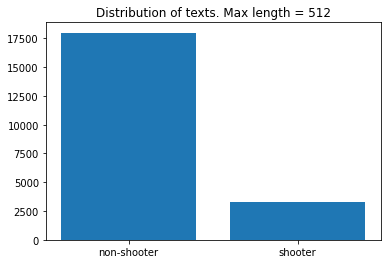

In [25]:
plt.bar(["non-shooter", "shooter"], [len(non_shooter_512.index), len(shooter_512.index)])
plt.title("Distribution of texts. Max length = 512")
plt.show()

In [26]:
shooter_256 = all_256[all_256["label"] == 1]
non_shooter_256 = all_256[all_256["label"] == 0]

In [27]:
print(f"shooter 256 length: {len(shooter_256.index)}")
print(f"non-shooter 256 length: {len(non_shooter_256.index)}")
print(f"ratio shooter/non_shooter: {len(shooter_256.index)/len(non_shooter_256.index)}")

shooter 256 length: 3681
non-shooter 256 length: 21094
ratio shooter/non_shooter: 0.1745045984640182


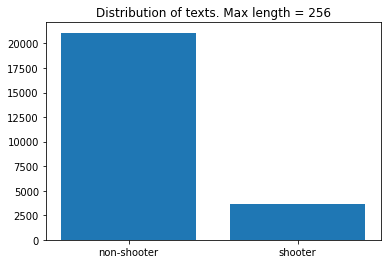

In [28]:
plt.bar(["non-shooter", "shooter"], [len(non_shooter_256.index), len(shooter_256.index)])
plt.title("Distribution of texts. Max length = 256")
plt.show()

In [29]:
avg_length = df["text"].astype("U").apply(len).mean()
avg_length_512 = all_512["text"].astype("U").apply(len).mean()
avg_length_256 = all_256["text"].astype("U").apply(len).mean()

median_length = df["text"].astype("U").apply(len).median()
median_length_512 = all_512["text"].astype("U").apply(len).median()
median_length_256 = all_256["text"].astype("U").apply(len).median()

In [30]:
print(f"avg len no max len: {avg_length}")
print(f"avg len 512: {avg_length_512}")
print(f"avg len 256: {avg_length_256}")

print(f"median len no max len: {median_length}")
print(f"median len 512: {median_length_512}")
print(f"median len 256: {median_length_256}")

avg len no max len: 556.9576943140323
avg len 512: 302.1450302831119
avg len 256: 259.04335015136223
median len no max len: 80.0
median len 512: 56.0
median len 256: 70.0
